<a href="https://colab.research.google.com/github/poet-developer/plot_fits_image/blob/main/plot_fits_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fits를 활용하여 우주 그림 그리기

### 원숭이 머리 성운 정보

#### 원숭이 머리 성운 위키정보 사용
https://ko.wikipedia.org/wiki/%EC%9B%90%EC%88%AD%EC%9D%B4_%EB%A8%B8%EB%A6%AC_%EC%84%B1%EC%9A%B4

#### 원숭이 머리 성운 Hubble Legacy Archive
https://hla.stsci.edu/hlaview.html#Inventory|filterText%3D%24filterTypes%3D|query_string=06%2009.7%2020%2030&posfilename=&poslocalname=&posfilecount=&listdelimiter=whitespace&listformat=degrees&RA=92.425000&Dec=20.500000&Radius=0.200000&inst-control=all&inst=ACS&inst=ACSGrism&inst=WFC3&inst=WFPC2&inst=NICMOS&inst=NICGRISM&inst=COS&inst=WFPC2-PC&inst=STIS&inst=FOS&inst=GHRS&imagetype=best&prop_id=&spectral_elt=&proprietary=both&preview=1&output_size=256&cutout_size=12.8|ra=&dec=&sr=&level=&image=&inst=ACS%2CACSGrism%2CWFC3%2CWFPC2%2CNICMOS%2CNICGRISM%2CCOS%2CWFPC2-PC%2CSTIS%2CFOS%2CGHRS&ds=


형태	행성상 성운
적경	06h 09.7m
적위	+20° 30′
거리	6,400 광년(2,000 파섹)
겉보기 등급	+6.8
별자리	오리온자리

파일 유형: SCI (과학 이미지 데이터)
이미지 크기: 1924 × 2085 픽셀
비트 심도 (BITPIX): -32 (부동소수점 데이터)
촬영 날짜: 2014-03-11T15:16:47 UTC
망원경: HST (허블 우주망원경)
사용된 기기: WFC3 (광역 카메라 3, 적외선 모드)
관측 대상: NGC 2174
적경 (RA): 92.29428416667°
적위 (Dec): 20.45989166667°
제안된 관측 프로젝트: 프로젝트 ID 13623
연구 책임자: Zolt Levay

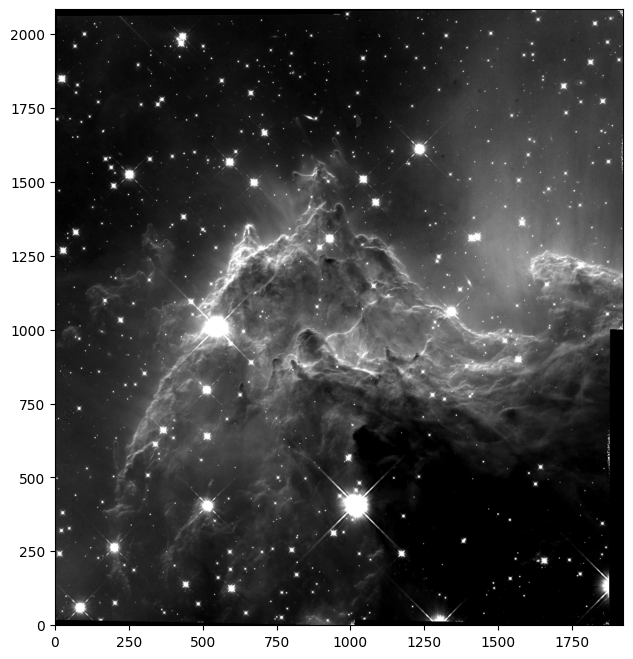

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def plot_fits_image(file_path):
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data  # 첫 번째 HDU의 데이터 로드

    if image_data is None:
        print("No image data found in FITS file.")
        return

    # 이미지 데이터가 2D가 아닐 경우, 첫 번째 슬라이스를 선택
    if len(image_data.shape) > 2:
        image_data = image_data[0]

    # 대비 조정 (어둡게 출력하도록 조정)
    # image를 image_data로 변경하여 이전에 로드된 데이터를 사용하도록 수정
    max_value = np.percentile(image_data, 99)
    min_value = np.percentile(image_data, 10)

    plt.figure(figsize=(8,8))
    # image를 image_data로 변경하여 이전에 로드된 데이터를 사용하도록 수정
    plt.imshow(image_data, cmap='gray', origin='lower', vmax = max_value, vmin = min_value)
    # cmap='gray' : 흑백으로 연출
    # origin='lower' : 좌표축의 좌측 아래를 (0,0)으로 설정
    plt.show()

# 사용 예시
file_path = "./hlsp_heritage_hst_wfc3-ir_ngc2174_f125w_v1_drz_gray.fits"
plot_fits_image(file_path)

파일 유형: SCI (과학 이미지 데이터)
이미지 크기: 1924 × 2085 × 3 (3개의 채널 포함)
비트 심도 (BITPIX): -32 (부동소수점 데이터)
촬영 날짜: 2025-03-15T16:32:04 UTC (파일 생성 날짜)
망원경: HST (허블 우주망원경)
사용된 기기: WFC3 (광역 카메라 3, 적외선 모드)
관측 대상: NGC 2174
적경 (RA): 92.29428416667°
적위 (Dec): 20.45989166667°
제안된 관측 프로젝트: 프로젝트 ID 13623


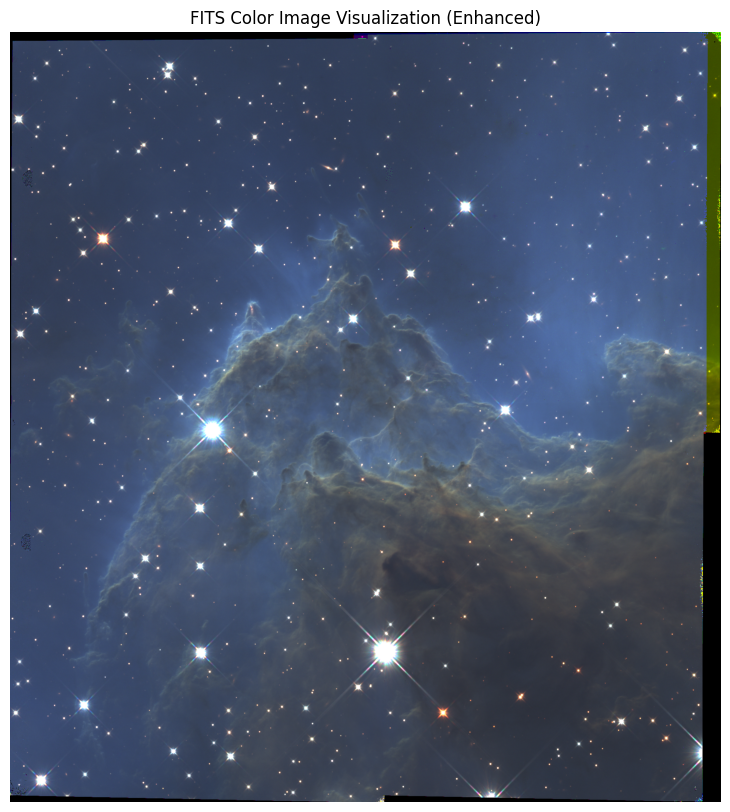

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def plot_fits_color_image(file_path):
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data  # 첫 번째 HDU의 데이터 로드

    if image_data is None:
        print("No image data found in FITS file.")
        return

    # 데이터 차원 확인 및 채널 분리 (다중 스펙트럼 채널이 있는 경우)
    if len(image_data.shape) == 3:
        r_channel = image_data[0]  # 첫 번째 채널 (예: 적외선)
        g_channel = image_data[1]  # 두 번째 채널
        b_channel = image_data[2]  # 세 번째 채널
    else:
        print("The FITS file does not contain multiple channels for a color image.")
        return

    # 대비 조정 (개별 채널별 조정, 너무 밝은 문제 해결)
    def normalize_channel(channel):
        channel = np.nan_to_num(channel)  # NaN 값이 있을 경우 0으로 변환
        min_val, max_val = np.percentile(channel, 0.5), np.percentile(channel, 99.5)
        channel = np.clip((channel - min_val) / (max_val - min_val), 0, 1)
        return channel

    r_channel = normalize_channel(r_channel)
    g_channel = normalize_channel(g_channel)
    b_channel = normalize_channel(b_channel)

    # RGB 이미지 스택 생성
    rgb_image = np.dstack((r_channel, g_channel, b_channel))

    # 이미지 출력
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image, origin='lower')
    plt.axis('off')  # 축 숨기기
    plt.title("FITS Color Image Visualization (Enhanced)")
    plt.show()

# 사용 예시
file_path = "./color_hlsp_heritage_hst_wfc3-ir_ngc2174_f160w_f125w_f105w_v1_drz_sci.fits"
plot_fits_color_image(file_path)

## 소행성 찾기

In [ ]:
import os

def get_fits_files(directory):
    """주어진 디렉토리에서 모든 FITS 파일을 검색하여 경로 리스트로 반환"""
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".fits")]

def check_fits_imagetype(file_paths):
    results = {}
    for file_path in file_paths:
        with open(file_path, "rb") as file:
            header = file.read(2880).decode("ascii", errors="ignore")  # FITS 헤더 읽기

        # 헤더에서 IMAGETYP 키워드 찾기
        if "IMAGETYP" in header:
            imagetype_line = [line for line in header.split("\n") if "IMAGETYP" in line]
            if imagetype_line:
                print(f"File: {file_path}")
                print(f"{imagetype_line[0]}")
                results[file_path] = "object" in imagetype_line[0].lower()
            else:
                results[file_path] = False
        else:
            results[file_path] = False
    return results

# 사용 예시
fits_directory = "./space"  # FITS 파일이 있는 디렉토리 경로
file_paths = get_fits_files(fits_directory)
results = check_fits_imagetype(file_paths)
print(results)

File: ./space/object-000101.fits
SIMPLE  =                    T                                                  BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     NAXIS   =                    2 /number of axes                                  NAXIS1  =                 2048 /fastest changing axis                           NAXIS2  =                 2048 /next to fastest changing axis                   BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           DATE-OBS= '2018-09-24T16:37:54' /YYYY-MM-DDThh:mm:ss observation start, UT      EXPTIME =   180.00000000000000 /Exposure time in seconds                        EXPOSURE=   180.00000000000000 /Exposure time in seconds                        SET-TEMP=  -70.000000000000000 /CCD temperature setpoint in C                   CCD-TEMP=  -70.000000000000000 /CCD temperature at start of exposure in C       XPIXSZ 